In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
from numpy import linalg as LA

In [ ]:
# from google.colab import files
# uploaded = files.upload()   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Ufop/Ufop2020_1/Avaliação_Sistemas/Semanas/Semana_7/Atividade 7'

 atividade			   'Performance Analysis Clusterization.pdf'
 DBMS-Performance-Monitor-Log.xls


In [ ]:
file_read = pd.read_excel('/content/drive/My Drive/Ufop/Ufop2020_1/Avaliação_Sistemas/Semanas/Semana_7/Atividade 7/DBMS-Performance-Monitor-Log.xls')


In [ ]:
df=file_read[['CPU','Disk 1','Disk 2']]

In [ ]:
df.describe()

,CPU,Disk 1,Disk 2
count,200.000000,200.000000,200.00000
mean,238.204115,51.375000,44.84500
std,165.862655,26.994777,26.42142
min,23.596747,5.000000,7.00000
25%,104.439406,33.000000,26.25000
50%,151.624667,63.000000,39.00000
75%,418.052165,72.000000,68.00000
max,507.450031,85.000000,92.00000


In [ ]:
df.sum()

CPU       47640.823081
Disk 1    10275.000000
Disk 2     8969.000000
dtype: float64

In [ ]:
df.min()

CPU       23.596747
Disk 1     5.000000
Disk 2     7.000000
dtype: float64

In [ ]:
#variancia
df.var()

CPU       27510.420484
Disk 1      728.717965
Disk 2      698.091432
dtype: float64

In [ ]:
#coeficiente de variação
df.std()/df.mean()

CPU       0.696305
Disk 1    0.525446
Disk 2    0.589172
dtype: float64

Text(0.5, 1.0, 'Histograma CPU')

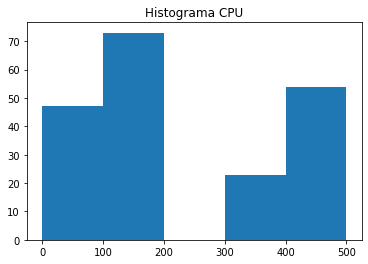

In [ ]:
plt.hist(df['CPU'],bins=[0,100,200,300,400,500])
plt.title('Histograma CPU')

Text(0.5, 1.0, 'Histograma Disk 1')

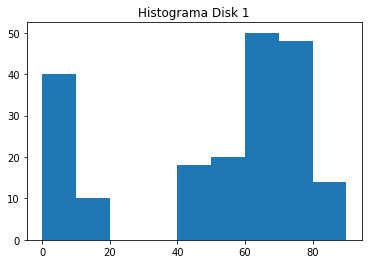

In [ ]:
plt.hist(df['Disk 1'],bins=[0,10,20,30,40,50,60,70,80,90])
plt.title('Histograma Disk 1')

Text(0.5, 1.0, 'Histograma Disk 2')

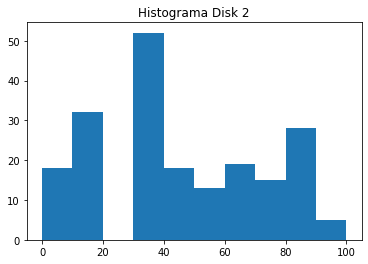

In [ ]:
plt.hist(df['Disk 2'],bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.title('Histograma Disk 2')

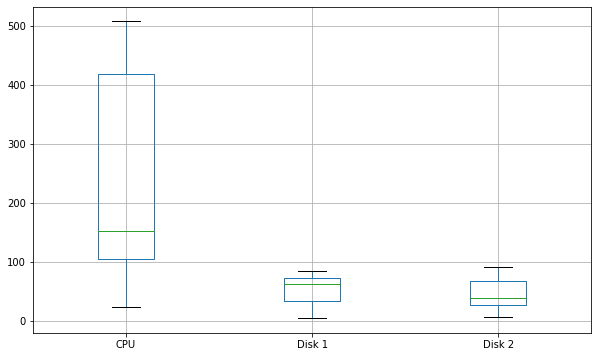

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column=['CPU','Disk 1', 'Disk 2'])

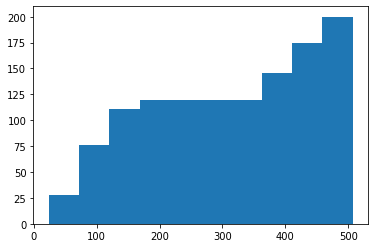

In [ ]:
plt.hist(df['CPU'],cumulative=True)
plt.show()

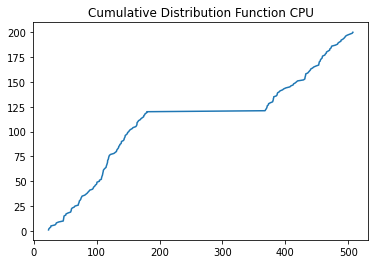

In [ ]:
cdf = df['CPU'].value_counts().sort_index().cumsum()
plt.title('Cumulative Distribution Function CPU')
cdf.plot()

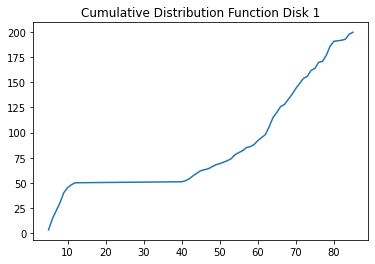

In [ ]:
cdf = df['Disk 1'].value_counts().sort_index().cumsum()
plt.title('Cumulative Distribution Function Disk 1')
cdf.plot()

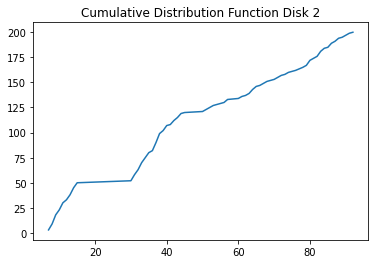

In [ ]:
cdf = df['Disk 2'].value_counts().sort_index().cumsum()
plt.title('Cumulative Distribution Function Disk 2')
cdf.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


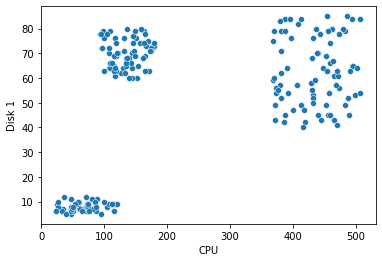

In [ ]:
sns.scatterplot('CPU', 'Disk 1', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


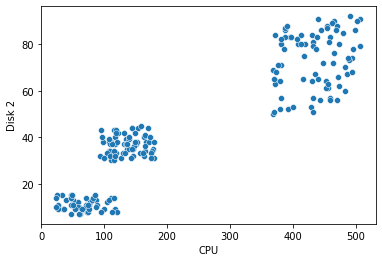

In [ ]:
sns.scatterplot('CPU', 'Disk 2', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


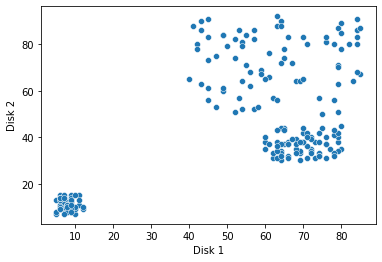

In [ ]:
sns.scatterplot('Disk 1', 'Disk 2', data=df)

## Principal Component Analysis (PCA)

In [ ]:
normalized_data=(df-df.mean())/df.std()

In [ ]:
normalized_data.describe()

,CPU,Disk 1,Disk 2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,2.248202e-16,-1.088019e-16,-4.329870e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.293886e+00,-1.717925e+00,-1.432361e+00
25%,-8.064788e-01,-6.806872e-01,-7.037850e-01
50%,-5.219948e-01,4.306389e-01,-2.212220e-01
75%,1.084319e+00,7.640367e-01,8.763723e-01
max,1.623306e+00,1.245611e+00,1.784726e+00


In [ ]:
normalized_data.sum()

CPU       4.496403e-14
Disk 1   -2.176037e-14
Disk 2   -8.659740e-15
dtype: float64

In [ ]:
normalized_data.std()

CPU       1.0
Disk 1    1.0
Disk 2    1.0
dtype: float64

In [ ]:
correlation = normalized_data.corr()
correlation
#correlation.style.background_gradient(cmap='coolwarm')

,CPU,Disk 1,Disk 2
CPU,1.000000,0.465376,0.916320
Disk 1,0.465376,1.000000,0.625876
Disk 2,0.916320,0.625876,1.000000


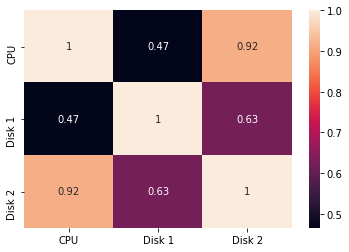

In [ ]:
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,
        annot=True)

In [ ]:
eigenvalues, eigenvectors = LA.eig(correlation)

In [ ]:
eigenvalues

array([2.35694981, 0.06277021, 0.58027998])

In [ ]:
eigenvectors

array([[-0.59635627, -0.64024793,  0.48419188],
       [-0.49573   , -0.18067576, -0.84947516],
       [-0.63135645,  0.74661828,  0.20964299]])

In [ ]:
principal_factor = np.matmul(normalized_data,eigenvectors)
principal_factor

,CPU,Disk 1,Disk 2
0,2.071129,-0.260756,0.694711
1,2.296409,-0.044941,0.604559
2,2.400606,0.066925,0.519959
3,2.062447,-0.121362,0.713738
4,2.084350,-0.300474,0.695443
...,...,...,...
195,-0.041871,-0.119349,-0.936820
196,0.416142,0.028321,-0.624995
197,0.312750,0.186882,-0.598382
198,0.246047,0.057713,-0.880850


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


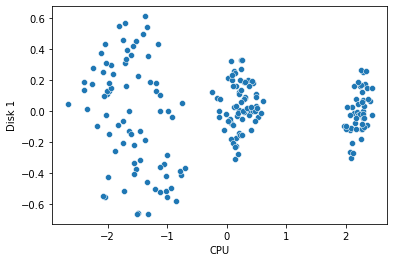

In [ ]:
sns.scatterplot('CPU', 'Disk 1', data=principal_factor)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


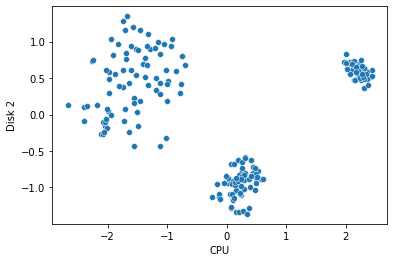

In [ ]:
sns.scatterplot('CPU', 'Disk 2', data=principal_factor)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


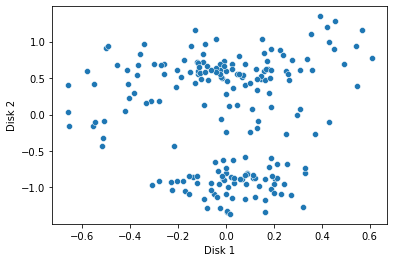

In [ ]:
sns.scatterplot('Disk 1', 'Disk 2', data=principal_factor)

In [ ]:
principal_factor.mean()

CPU      -1.164346e-16
Disk 1   -5.051515e-17
Disk 2    3.441691e-17
dtype: float64

In [ ]:
principal_factor.std()

CPU       1.535236
Disk 1    0.250540
Disk 2    0.761761
dtype: float64

In [ ]:
sum_pf = principal_factor.sum()
sum_pf

CPU      -2.328693e-14
Disk 1   -1.010303e-14
Disk 2    6.883383e-15
dtype: float64

In [ ]:
sum_square_pf = (principal_factor**2).sum()
sum_square_pf

CPU       469.033012
Disk 1     12.491271
Disk 2    115.475716
dtype: float64

In [ ]:
sum_total = sum_square_pf.sum()
sum_total

597.0

In [ ]:
cpu_impact = sum_square_pf['CPU']/sum_total
cpu_impact

0.7856499368828583

In [ ]:
disk_1_impact = sum_square_pf['Disk 1']/sum_total
disk_1_impact

0.020923402712445634

In [ ]:
disk_2_impact = sum_square_pf['Disk 2']/sum_total
disk_2_impact

0.19342666040469614

In [ ]:
def applyPercentage(l):
	return list( map(lambda x: x * 100, l) )
 
percentages = applyPercentage([cpu_impact,disk_1_impact,disk_2_impact])
percentages

[78.56499368828584, 2.0923402712445633, 19.342666040469613]

([<matplotlib.patches.Wedge at 0x7f1831f82a58>,
 [Text(-0.7483773567607921, -0.9380465510238446, 'CPU'),
  Text(1.0541537553058289, 0.3142608155252875, 'Disk 1'),
  Text(0.6280496059808988, 0.9030801140691993, 'Disk 2')],
 [Text(-0.436553458110462, -0.5471938214305759, '78.6%'),
  Text(0.574992957439543, 0.17141499028652044, '2.1%'),
  Text(0.3425725123532175, 0.4925891531286541, '19.3%')])

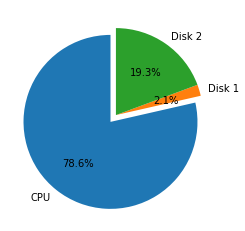

In [ ]:
explode = (0.1, 0, 0)
plt.pie(percentages,labels=['CPU', 'Disk 1', 'Disk 2'],explode=explode,autopct='%1.1f%%', startangle=90)

In [ ]:
from sklearn.decomposition import PCA

Resultado do PCA : 

	CPU : 0.976705
	Disk 1 : 0.020862
	Disk 2 : 0.002433


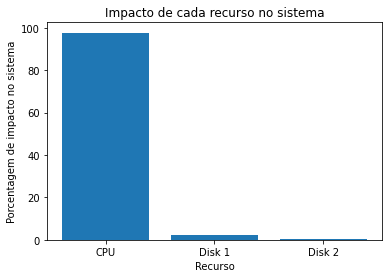

<Figure size 432x288 with 0 Axes>

In [ ]:
pca = PCA(n_components=3)

pca.fit(df)
percentages = pca.explained_variance_ratio_
print('Resultado do PCA : \n\n\tCPU : %f\n\tDisk 1 : %f\n\tDisk 2 : %f' % (percentages[0],percentages[1],percentages[2]))

plt.clf()
plt.bar(['CPU', 'Disk 1', 'Disk 2'], applyPercentage(percentages) )
plt.xlabel('Recurso')
plt.ylabel('Porcentagem de impacto no sistema')
plt.title('Impacto de cada recurso no sistema')
plt.savefig('resources-impact-skleann.png', format='png')
plt.show()
plt.clf()

# **Análise para Clusterização**


## extração das features importantes

In [ ]:
df2 = file_read[['CPU','Disk 2']]

In [ ]:
df2.head()

,CPU,Disk 2
0,116.824440,9
1,64.383041,9
2,35.402999,9
3,104.408537,12
4,119.793137,8


In [ ]:
df2.min()

CPU       23.596747
Disk 2     7.000000
dtype: float64

In [ ]:
df2.max()

CPU       507.450031
Disk 2     92.000000
dtype: float64

In [ ]:
7/507.45

0.01379446250862154

## dispersão dos dados originais

Text(0, 0.5, 'Disk 2')

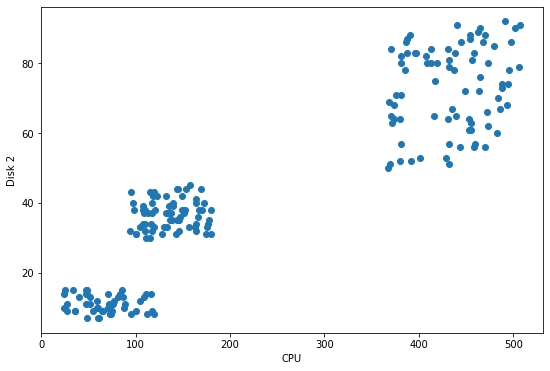

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(df2['CPU'],df2['Disk 2'])
plt.xlabel('CPU')
plt.ylabel('Disk 2')

## boxplot do dados originais

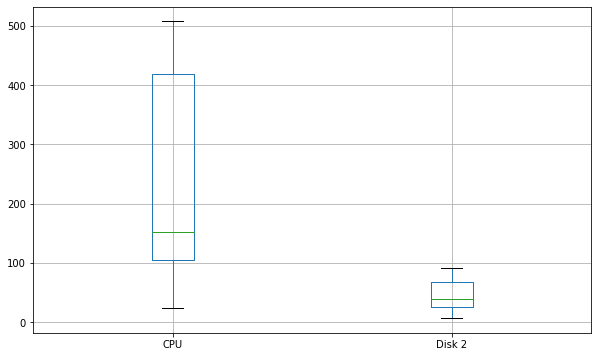

In [ ]:
plt.figure(figsize=(10,6))
df2.boxplot(column=['CPU','Disk 2'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## funções para calcular distancia inter e intra clusters

In [ ]:
def k_intra_distance(data, cx, cy, i_centroid, cluster_labels):
  distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in data[cluster_labels == i_centroid]]
  return np.mean(distances)


In [ ]:
def k_inter_distance(centroids):
  total_distances = []
  for (cx, cy) in centroids:
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x,y) in centroids]
    total_distances.extend(distances)
  total_distances_filter = list(filter(lambda a: a!=0, total_distances)) #remove os 0's
  return list(dict.fromkeys(total_distances_filter)) #remove as duplicatas


## aplicação da escala

In [ ]:
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)

In [ ]:
df3[:10]

array([[-0.73364475, -1.36006884],
       [-1.0506118 , -1.36006884],
       [-1.22577338, -1.36006884],
       [-0.80868913, -1.24623967],
       [-0.71570131, -1.39801189],
       [-1.1498985 , -1.43595495],
       [-1.00183688, -1.39801189],
       [-1.2354613 , -1.1324105 ],
       [-1.01122075, -1.17035356],
       [-0.91796631, -1.20829662]])

In [ ]:
df_df3 = pd.DataFrame(df3, columns=['CPU', 'Disk 2'])

In [ ]:
df_df3.mean()

CPU      -1.437739e-16
Disk 2    2.087219e-16
dtype: float64

In [ ]:
df_df3.std()

CPU       1.002509
Disk 2    1.002509
dtype: float64

## boxplot dos dados escalados

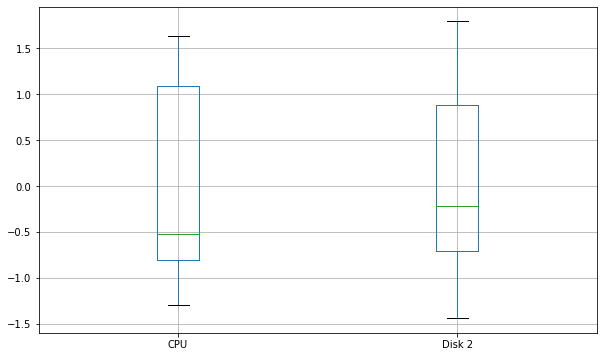

In [ ]:
plt.figure(figsize=(10,6))
df_df3.boxplot(column=['CPU','Disk 2'])

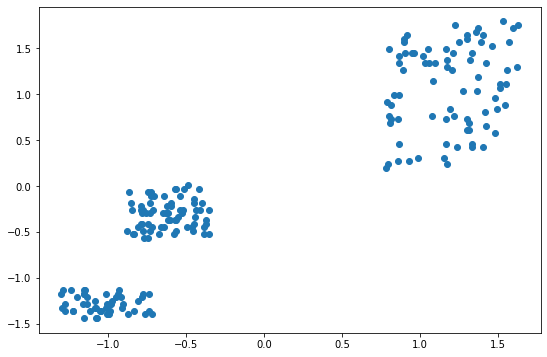

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(df3[:,0],df3[:,1])

## encontrando o o número de k clusters

In [ ]:
inter_distances = []
intra_distances = []
beta_distances = []
total_clusters = np.arange(3,19)

for i in range(3,19):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  clusters = kmeans.fit_predict(df3)

  centroids = kmeans.cluster_centers_ 

  mean_inter_distance = k_inter_distance(centroids)
  df_inter_distance = pd.DataFrame(mean_inter_distance, columns=['distance'])
  cv_inter = df_inter_distance['distance'].std()/df_inter_distance['distance'].mean()
  inter_distances.append(cv_inter)

  mean_intra_distance = []
  for i, (c_x, c_y) in enumerate(centroids):
    mean_distance = k_intra_distance(df3, c_x, c_y, i, clusters)
    mean_intra_distance.append(mean_distance)
  df_intra_distance = pd.DataFrame(mean_intra_distance, columns=['distance'])
  cv_intra = df_intra_distance['distance'].std()/df_intra_distance['distance'].mean()
  intra_distances.append(cv_intra)

  cv_beta = cv_intra/cv_inter
  beta_distances.append(cv_beta)

## plotando os valores para cada interação

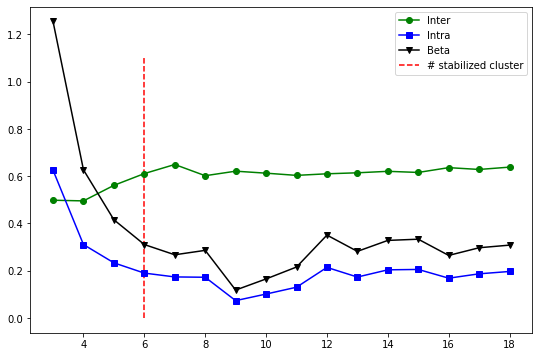

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(total_clusters, inter_distances, marker='o', label='Inter', color='green')
plt.plot(total_clusters, intra_distances, marker='s', label='Intra', color='blue')
plt.plot(total_clusters, beta_distances, marker='v', label='Beta', color='black')
plt.vlines(x=6, ymin=0, ymax=1.1, colors='red', linestyles='dashed', label='# stabilized cluster')
plt.legend()

## kmeans para os dados escalados

In [ ]:
kmeans_scale = KMeans(n_clusters=6, init='k-means++')
clusters_scale = kmeans_scale.fit_predict(df3)

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

Text(0, 0.5, 'Disk 2')

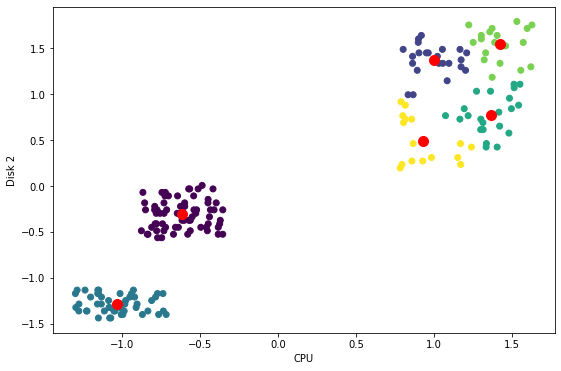

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(df3[:,0], df3[:,1], c=clusters_scale)
plt.scatter(kmeans_scale.cluster_centers_[:,0], kmeans_scale.cluster_centers_[:,1], s=100, c='red')
plt.xlabel('CPU')
plt.ylabel('Disk 2')

## dispersão dos dados originais com o kmeans do dados escalados

Text(0, 0.5, 'Disk 2')

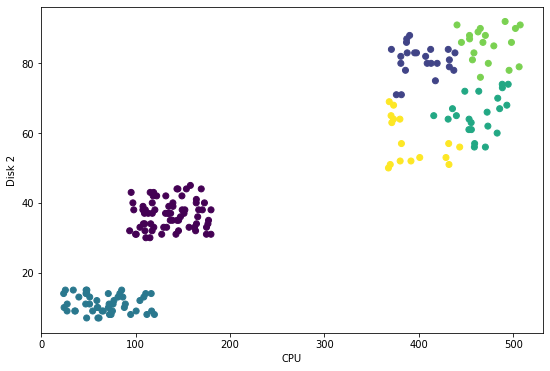

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(df2['CPU'], df2['Disk 2'], c=clusters_scale)
plt.xlabel('CPU')
plt.ylabel('Disk 2')

## população dos clusters dos dados escalados

In [ ]:
np.bincount(clusters_scale)

array([70, 23, 50, 22, 19, 16])

## kmeans para os dados originais

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++')
clusters = kmeans.fit_predict(df2)

Text(0, 0.5, 'Disk 2')

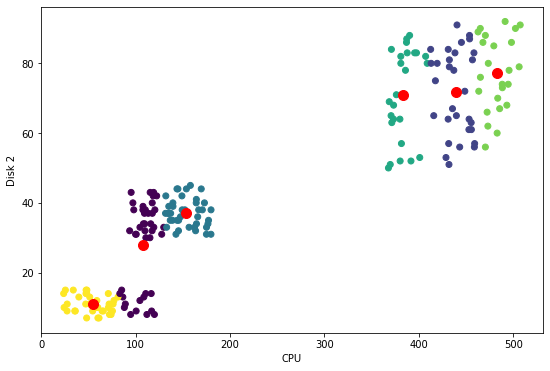

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(df2['CPU'], df2['Disk 2'], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
plt.xlabel('CPU')
plt.ylabel('Disk 2')

## população dos clusters dos dados originais

In [ ]:
np.bincount(clusters)

array([43, 30, 41, 26, 24, 36])

## calculo dos centroides para os dados originais considerando o kmeans dos dados escalados

In [ ]:
new_centroids=[]
population = []
for i in range(6):
  cpu = df2[kmeans_scale.labels_== i].mean()["CPU"]
  disk2 = df2[kmeans_scale.labels_== i].mean()["Disk 2"]
  popul = len(df2[kmeans_scale.labels_== i])
  new_centroids.append([cpu,disk2])
  population.append(popul)
new_centroids

[[136.1474457754729, 36.68571428571428],
 [403.1157072009676, 80.95652173913044],
 [67.50405409602546, 11.02],
 [463.8127100947757, 65.31818181818181],
 [473.4136090156112, 85.57894736842105],
 [391.5562320669027, 57.8125]]

In [ ]:
population

[70, 23, 50, 22, 19, 16]

## nomeando os centroides


Text(0, 0.5, 'Disk 2')

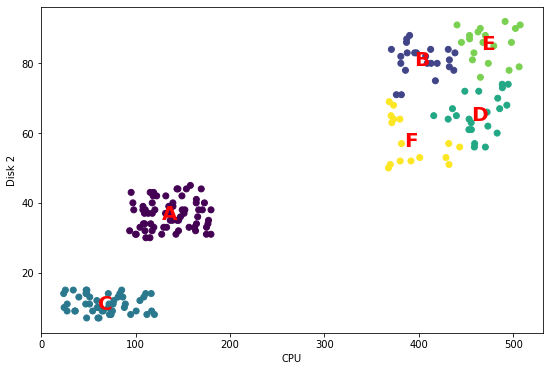

In [ ]:
plt.figure(figsize=(9,6))
groups = {'A': (136.1474457754729, 36.68571428571428),
         'B': (403.1157072009676, 80.95652173913044),
         'C': (67.50405409602546, 11.02),
         'D': (463.8127100947757, 65.31818181818181),
         'E': (473.4136090156112, 85.57894736842105),
         'F': (391.5562320669027, 57.8125)}

for label,values in zip(groups.keys(),groups.values()):
  plt.annotate(label, 
               xy=(values[0],values[1]), 
               xytext=(values[0],values[1]), 
               size=20, 
               weight='bold', 
               color='red', 
               horizontalalignment='center',
               verticalalignment='center')
plt.scatter(df2['CPU'], df2['Disk 2'], c=clusters_scale)
plt.xlabel('CPU')
plt.ylabel('Disk 2')

In [ ]:
# for i in range(len(kmeans_scale.cluster_centers_)):
#   print(kmeans.cluster_centers_[i])
#   print(sum(kmeans.labels_==i))
#   print('\n')

## realizando a sumarização dos dados

In [ ]:
clusterA = df2[kmeans_scale.labels_==0]
clusterB = df2[kmeans_scale.labels_==1]
clusterC = df2[kmeans_scale.labels_==2]
clusterD = df2[kmeans_scale.labels_==3]
clusterE = df2[kmeans_scale.labels_==4]
clusterF = df2[kmeans_scale.labels_==5]

In [ ]:
df_clusterA = pd.DataFrame(clusterA, columns=['CPU', 'Disk 2'])
print(df_clusterA.describe())
print('\n')
print(df_clusterA.var())
print('\n')
print(df_clusterA.std()/df_clusterA.mean())
print('\n')
print(df_clusterA.sum())
print('\n')
print(df_clusterA.max()-df_clusterA.min())
print(type(df_clusterA.describe()))

              CPU     Disk 2
count   70.000000  70.000000
mean   136.147446  36.685714
std     24.748318   4.102113
min     93.535859  30.000000
25%    115.441814  33.000000
50%    135.876165  37.000000
75%    155.792309  39.750000
max    179.784330  45.000000


CPU       612.479241
Disk 2     16.827329
dtype: float64


CPU       0.181776
Disk 2    0.111818
dtype: float64


CPU       9530.321204
Disk 2    2568.000000
dtype: float64


CPU       86.248471
Disk 2    15.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>


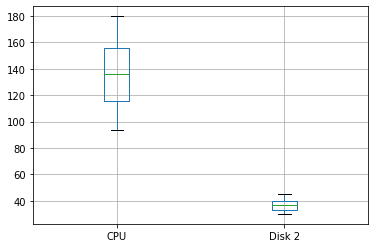

In [ ]:
df_clusterA.boxplot(column=['CPU', 'Disk 2'])

In [ ]:
df_clusterB = pd.DataFrame(clusterB, columns=['CPU', 'Disk 2'])
print(df_clusterB.describe())
print('\n')
print(df_clusterB.var())
print('\n')
print(df_clusterB.std()/df_clusterB.mean())
print('\n')
print(df_clusterB.sum())
print('\n')
print(df_clusterB.max()-df_clusterB.min())

              CPU     Disk 2
count   23.000000  23.000000
mean   403.115707  80.956522
std     21.448058   4.353455
min    370.951677  71.000000
25%    386.399766  79.500000
50%    397.535121  82.000000
75%    418.520915  83.500000
max    438.315462  88.000000


CPU       460.019178
Disk 2     18.952569
dtype: float64


CPU       0.053206
Disk 2    0.053775
dtype: float64


CPU       9271.661266
Disk 2    1862.000000
dtype: float64


CPU       67.363784
Disk 2    17.000000
dtype: float64


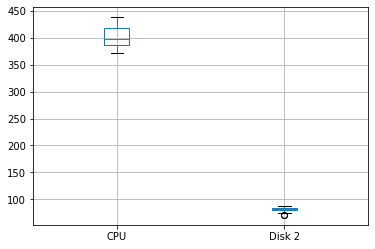

In [ ]:
df_clusterB.boxplot(column=['CPU', 'Disk 2'])

In [ ]:
df_clusterC = pd.DataFrame(clusterC, columns=['CPU', 'Disk 2'])
print(df_clusterC.describe())
print('\n')
print(df_clusterC.var())
print('\n')
print(df_clusterC.std()/df_clusterC.mean())
print('\n')
print(df_clusterC.sum())
print('\n')
print(df_clusterC.max()-df_clusterC.min())

              CPU     Disk 2
count   50.000000  50.000000
mean    67.504054  11.020000
std     26.639392   2.511118
min     23.596747   7.000000
25%     47.970690   9.000000
50%     68.258274  11.000000
75%     84.593882  13.000000
max    119.793137  15.000000


CPU       709.657223
Disk 2      6.305714
dtype: float64


CPU       0.394634
Disk 2    0.227869
dtype: float64


CPU       3375.202705
Disk 2     551.000000
dtype: float64


CPU       96.19639
Disk 2     8.00000
dtype: float64


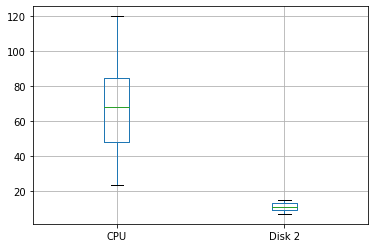

In [ ]:
df_clusterC.boxplot(column=['CPU', 'Disk 2'])

In [ ]:
df_clusterD = pd.DataFrame(clusterD, columns=['CPU', 'Disk 2'])
print(df_clusterD.describe())
print('\n')
print(df_clusterD.var())
print('\n')
print(df_clusterD.std()/df_clusterD.mean())
print('\n')
print(df_clusterD.sum())
print('\n')
print(df_clusterD.max()-df_clusterD.min())

              CPU     Disk 2
count   22.000000  22.000000
mean   463.812710  65.318182
std     21.674414   5.617883
min    415.835542  56.000000
25%    453.132575  61.250000
50%    461.354211  65.000000
75%    483.490909  69.500000
max    494.745690  74.000000


CPU       469.780241
Disk 2     31.560606
dtype: float64


CPU       0.046731
Disk 2    0.086008
dtype: float64


CPU       10203.879622
Disk 2     1437.000000
dtype: float64


CPU       78.910148
Disk 2    18.000000
dtype: float64


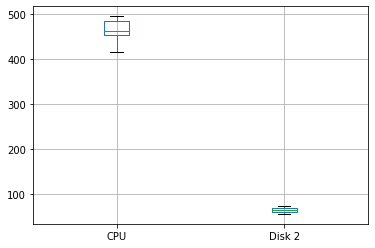

In [ ]:
df_clusterD.boxplot(column=['CPU', 'Disk 2'])

In [ ]:
df_clusterE = pd.DataFrame(clusterE, columns=['CPU', 'Disk 2'])
print(df_clusterE.describe())
print('\n')
print(df_clusterE.var())
print('\n')
print(df_clusterE.std()/df_clusterE.mean())
print('\n')
print(df_clusterE.sum())
print('\n')
print(df_clusterE.max()-df_clusterE.min())

              CPU     Disk 2
count   19.000000  19.000000
mean   473.413609  85.578947
std     21.070123   4.811050
min    440.485568  76.000000
25%    457.637496  82.000000
50%    467.953674  86.000000
75%    493.570681  89.500000
max    507.450031  92.000000


CPU       443.950095
Disk 2     23.146199
dtype: float64


CPU       0.044507
Disk 2    0.056218
dtype: float64


CPU       8994.858571
Disk 2    1626.000000
dtype: float64


CPU       66.964464
Disk 2    16.000000
dtype: float64


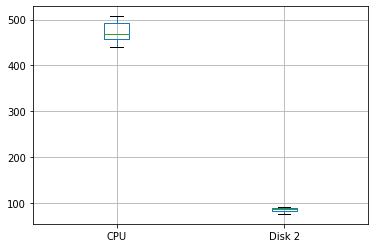

In [ ]:
df_clusterE.boxplot(column=['CPU', 'Disk 2'])

In [ ]:
df_clusterF = pd.DataFrame(clusterF, columns=['CPU', 'Disk 2'])
print(df_clusterF.describe())
print('\n')
print(df_clusterF.var())
print('\n')
print(df_clusterF.std()/df_clusterF.mean())
print('\n')
print(df_clusterF.sum())
print('\n')
print(df_clusterF.max()-df_clusterF.min())

              CPU     Disk 2
count   16.000000  16.000000
mean   391.556232  57.812500
std     26.886832   6.615323
min    367.807119  50.000000
25%    371.183509  52.000000
50%    380.108689  56.500000
75%    407.948628  64.000000
max    443.339218  69.000000


CPU       722.901749
Disk 2     43.762500
dtype: float64


CPU       0.068667
Disk 2    0.114427
dtype: float64


CPU       6264.899713
Disk 2     925.000000
dtype: float64


CPU       75.532099
Disk 2    19.000000
dtype: float64


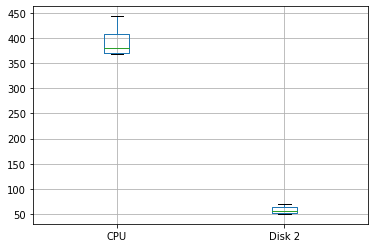

In [ ]:
df_clusterF.boxplot(column=['CPU', 'Disk 2'])

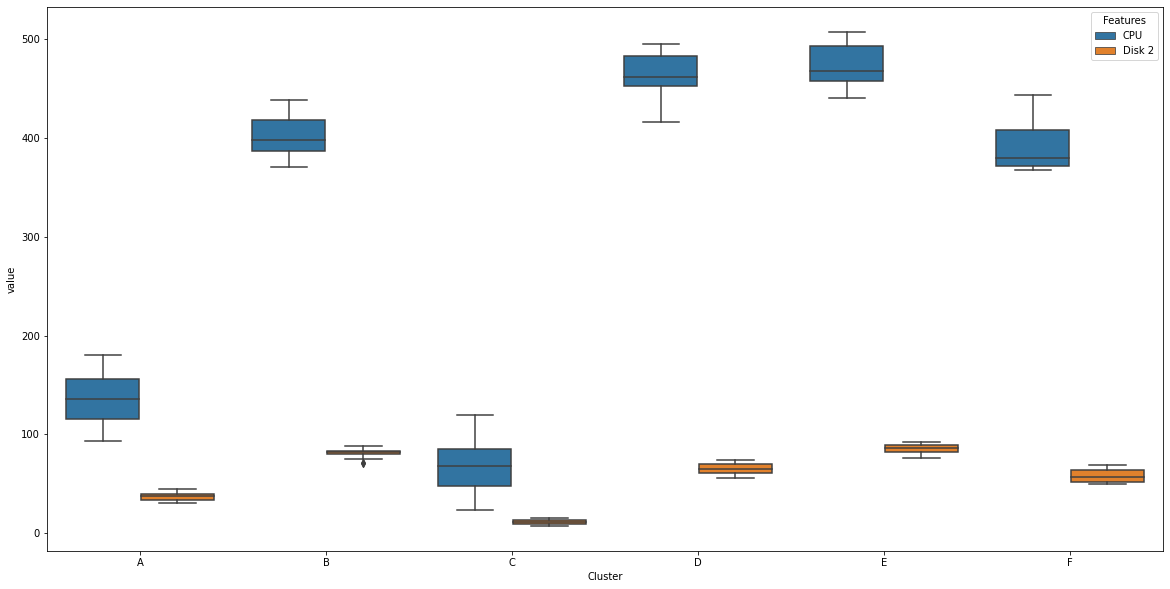

In [ ]:
dfA=df_clusterA.assign(Cluster='A')
dfB=df_clusterB.assign(Cluster='B')
dfC=df_clusterC.assign(Cluster='C')
dfD=df_clusterD.assign(Cluster='D')
dfE=df_clusterE.assign(Cluster='E')
dfF=df_clusterF.assign(Cluster='F')

dfs = pd.concat([dfA, dfB, dfC, dfD, dfE, dfF])
all_dfs = pd.melt(dfs, id_vars=['Cluster'] , var_name='Features')
plt.figure(figsize=(20,10))
sns.boxplot(x='Cluster', y='value', hue='Features', data=all_dfs)
plt.show()